## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [61]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [62]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [63]:
# data shape
data.shape

(1309, 14)

In [64]:
# Get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [65]:
# data describe
data.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [66]:
# Data columns
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [67]:
# Check Duplicates
data[data.duplicated(['cabin'])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.525,C62 C64,C,4,?,"New York, NY"
13,1,1,"Barber, Miss. Ellen 'Nellie'",female,26,0,0,19877,78.85,?,S,6,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [68]:
# find out how many missing values in each attribute
data.isna().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [69]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [70]:
# find out how many missing values in each attribute
data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [71]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [72]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [73]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [74]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [75]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [76]:
target = 'survived'

In [77]:
vars_num = data.select_dtypes(include=['number']).columns # fill your code here

vars_cat = data.select_dtypes(include=['object', 'category']).columns# fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


### Find missing values in variables

In [78]:
# first in numerical variables
data.select_dtypes(include=['number']).isna().sum()


pclass        0
survived      0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

In [79]:
# now in categorical variables
data.select_dtypes(include=['object', 'category']).isna().sum()


sex            0
cabin       1014
embarked       2
title          0
dtype: int64

### Determine cardinality of categorical variables

In [80]:
# Assuming 'data' is your DataFrame
categorical_columns = data.select_dtypes(include=['object', 'category'])
cardinality = categorical_columns.nunique()
print(cardinality)


sex           2
cabin       181
embarked      3
title         5
dtype: int64


In [81]:
# The range of value for each column
print("The range of value for each column are: \n", data.describe().loc[['min', 'max']])

The range of value for each column are: 
      pclass  survived      age  sibsp  parch      fare
min     1.0       0.0   0.1667    0.0    0.0    0.0000
max     3.0       1.0  80.0000    8.0    9.0  512.3292


### Determine the distribution of numerical variables

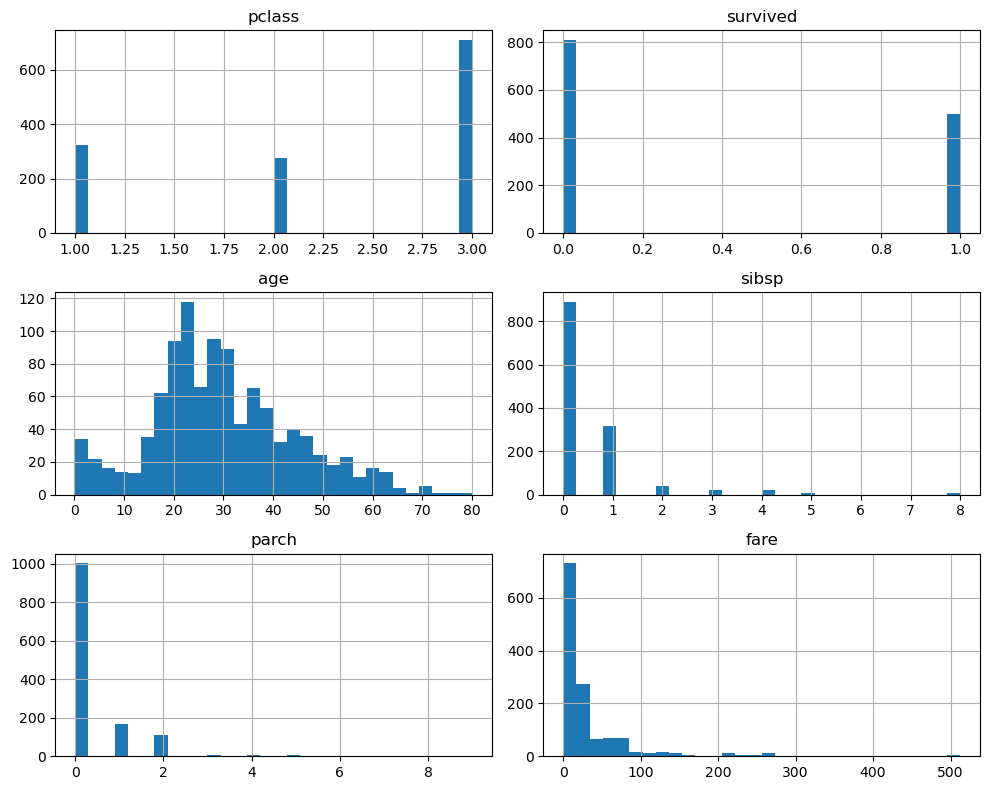

In [82]:
import matplotlib.pyplot as plt

data.select_dtypes(include=['number']).hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()


In [83]:
# # Apply log transformation (adding 1 to avoid log(0) errors)
# data['fare'] = np.log(data['fare'] + 1)
# data['parch'] = np.log(data['parch'] + 1)
# data['sibsp'] = np.log(data['sibsp'] + 1)

# # MinMax scale Age
# scaler = MinMaxScaler()
# data['age'] = scaler.fit_transform(data[['age']])  # Fit and transform Age

# # Plot histograms for transformed variables
# columns_to_plot = ['fare', 'parch', 'sibsp', 'age']
# data[columns_to_plot].hist(bins=30, figsize=(10, 8), grid=False)
# plt.tight_layout()
# plt.show()


In [84]:
# Impute Age column grouped by sex and title

# Group by 'sex' and 'title', then calculate the median age for each group
grouped_medians = data.groupby(['sex', 'title'])['age'].median()

# Define a function to fill missing values using the grouped medians
def impute_age(row):
    if pd.isna(row['age']):  # Check if Age is missing
        return grouped_medians[row['sex'], row['title']]  # Return the median for the group
    else:
        return row['age']

# Apply the function to fill missing values in the Age column
data['age'] = data.apply(impute_age, axis=1)

# Verify the results
print(data[['sex', 'title', 'age']].head())



      sex   title      age
0  female    Miss  29.0000
1    male  Master   0.9167
2  female    Miss   2.0000
3    male      Mr  30.0000
4  female     Mrs  25.0000


In [85]:
# Show row in fare where 'Fare' has missing values
missing_fare_rows = data[data['fare'].isna()]

print(missing_fare_rows)


      pclass  survived   sex   age  sibsp  parch  fare cabin embarked title
1225       3         0  male  60.5      0      0   NaN   NaN        S    Mr


In [86]:
# Group by 'Pclass', 'SibSp', and 'Parch', then calculate the median Fare for each group
grouped_medians = data.groupby(['pclass', 'sibsp', 'parch'])['fare'].median()

# Define a function to impute missing Fare values
def impute_fare(row):
    if pd.isna(row['fare']):  # Check if Fare is missing
        return grouped_medians[row['pclass'], row['sibsp'], row['parch']]  # Return the group's median Fare
    else:
        return row['fare']

# Apply the function to the Fare column
data['fare'] = data.apply(impute_fare, axis=1)

# Verify the results
print(data[['pclass', 'sibsp', 'parch', 'fare']].head())


   pclass  sibsp  parch      fare
0       1      0      0  211.3375
1       1      1      2  151.5500
2       1      1      2  151.5500
3       1      1      2  151.5500
4       1      1      2  151.5500


In [87]:
# first in numerical variables
data.select_dtypes(include=['number']).isna().sum()

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [88]:
# now in categorical variables
data.select_dtypes(include=['object', 'category']).isna().sum()

sex            0
cabin       1014
embarked       2
title          0
dtype: int64

In [89]:
data.cabin.unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [90]:
# Remove numbers and keep cabin letter
# Remove numbers from the 'Cabin' column and keep only letters
data['cabin'] = data['cabin'].str.replace(r'\d+', '', regex=True)

# Display the updated Cabin column
data.cabin.unique()


array(['B', 'C', 'E', 'D', 'A', nan, 'T', 'F', 'G'], dtype=object)

In [91]:
# Group by 'pclass' and 'sex' to calculate the mode for Cabin
grouped_modes = data.groupby(['pclass', 'sex'])['cabin'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Define a function to impute missing Cabin values
def impute_cabin(row):
    if pd.isna(row['cabin']):  # Check if Cabin is missing
        return grouped_modes[row['pclass'], row['sex']]  # Return the mode for the group
    else:
        return row['cabin']

# Apply the function to the Cabin column
data['cabin'] = data.apply(impute_cabin, axis=1)

# Verify the results
print(data[['pclass', 'sex', 'cabin']].head())


   pclass     sex cabin
0       1  female     B
1       1    male     C
2       1  female     C
3       1    male     C
4       1  female     C


In [92]:
# Display the updated Cabin column
data.cabin.unique()

array(['B', 'C', 'E', 'D', 'A', 'T', 'F', 'G'], dtype=object)

In [93]:
# Show row in fare where 'Fare' has missing values
missing_fare_rows = data[data['embarked'].isna()]

print(missing_fare_rows)


     pclass  survived     sex   age  sibsp  parch  fare cabin embarked title
168       1         1  female  38.0      0      0  80.0     B      NaN  Miss
284       1         1  female  62.0      0      0  80.0     B      NaN   Mrs


In [94]:
# Group by 'pclass', 'sibsp', and 'parch' to calculate the mode for 'embarked'
grouped_modes = data.groupby(['pclass', 'sibsp', 'parch'])['embarked'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

# Define a function to impute missing Embarked values
def impute_embarked(row):
    if pd.isna(row['embarked']):  # Check if Embarked is missing
        return grouped_modes[row['pclass'], row['sibsp'], row['parch']]  # Return the mode for the group
    else:
        return row['embarked']

# Apply the function to the Embarked column
data['embarked'] = data.apply(impute_embarked, axis=1)

# Verify the results
print(data[['pclass', 'sibsp', 'parch', 'embarked']].head())


   pclass  sibsp  parch embarked
0       1      0      0        S
1       1      1      2        S
2       1      1      2        S
3       1      1      2        S
4       1      1      2        S


In [95]:
# now in categorical variables
data.select_dtypes(include=['object', 'category']).isna().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

In [96]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C,S,Master
2,1,0,female,2.0000,1,2,151.5500,C,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C,S,Mrs


In [97]:
# Check for all
data.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
dtype: int64

In [98]:
data.nunique()

pclass        3
survived      2
sex           2
age          98
sibsp         7
parch         8
fare        281
cabin         8
embarked      3
title         5
dtype: int64

## First approach using one-hot encoding (sparse matrix)

In [99]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

df = data.copy()

# Step 1: Select relevant columns
selected_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'title']
X = df[selected_columns]
y = df['survived']  # Target variable

# Step 2: Convert categorical variables (e.g., 'sex', 'embarked', 'title') using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'embarked', 'title'], drop_first=True)
print(X.head())

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Convert predictions to binary (threshold = 0.5)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
mse = mean_squared_error(y_test, y_pred)

# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy)


   pclass      age  sibsp  parch      fare  sex_male  embarked_Q  embarked_S  \
0       1  29.0000      0      0  211.3375     False       False        True   
1       1   0.9167      1      2  151.5500      True       False        True   
2       1   2.0000      1      2  151.5500     False       False        True   
3       1  30.0000      1      2  151.5500      True       False        True   
4       1  25.0000      1      2  151.5500     False       False        True   

   title_Miss  title_Mr  title_Mrs  title_Other  
0        True     False      False        False  
1       False     False      False        False  
2        True     False      False        False  
3       False      True      False        False  
4       False     False       True        False  
Model Coefficients: [-1.33247032e-01 -3.38914646e-03 -6.09795867e-02 -3.43749957e-02
  3.40045919e-04 -5.35389573e-01 -7.24908520e-02 -8.01704157e-02
 -4.77841336e-01 -4.51938636e-01 -3.65047013e-01 -4.59651861e-01]
Mod

## Second approach using mapping and Minmax sacling

In [100]:
data2 = data.copy()

# Binary Encoding (most suitable for Sex since it has two categories)
data2['sex'] = data2['sex'].map({'male': 0, 'female': 1})

data2.sex.unique()

array([1, 0], dtype=int64)

In [101]:
data2['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', 'T', 'F', 'G'], dtype=object)

In [102]:
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

# Apply the mapping to the 'cabin' column
data2['cabin'] = data2['cabin'].map(cabin_mapping)

# Display the transformed DataFrame
print(data2['cabin'].head())



0    1
1    2
2    2
3    2
4    2
Name: cabin, dtype: int64


In [44]:
data2.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [103]:
cabin_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Apply the mapping to the 'cabin' column
data2['embarked'] = data2['embarked'].map(cabin_mapping)

# Display the transformed DataFrame
print(data2['embarked'].head())

0    0
1    0
2    0
3    0
4    0
Name: embarked, dtype: int64


In [104]:
data2.title.unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Other'], dtype=object)

In [105]:
title_mapping = {'Miss': 0, 'Master': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4}

# Apply the mapping to the 'cabin' column
data2['title'] = data2['title'].map(title_mapping)

# Display the transformed DataFrame
print(data2['title'].head())

0    0
1    1
2    0
3    2
4    3
Name: title, dtype: int64


In [106]:
# Check for all
data2.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,1,29.0000,0,0,211.3375,1,0,0
1,1,1,0,0.9167,1,2,151.5500,2,0,1
2,1,0,1,2.0000,1,2,151.5500,2,0,0
3,1,0,0,30.0000,1,2,151.5500,2,0,2
4,1,0,1,25.0000,1,2,151.5500,2,0,3


## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

In [108]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

In [109]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1.0,0.0,0.336343,0.000,0.0,0.015469,0.714286,0.0,0.5
1,0.0,1.0,0.553047,0.000,0.0,0.262527,0.571429,0.5,0.0
2,1.0,0.0,0.390519,0.000,0.0,0.015094,0.714286,1.0,0.5
3,1.0,1.0,0.241535,0.000,0.0,0.015176,0.857143,0.0,0.0
4,0.5,0.0,0.390519,0.125,0.0,0.040989,0.714286,0.0,0.5


In [110]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1.0,0.0,0.512415,0.000,0.000000,0.015412,0.714286,0.0,0.5
1,0.5,1.0,0.282167,0.000,0.111111,0.040989,0.714286,0.0,0.0
2,0.5,0.0,0.566591,0.125,0.000000,0.052700,0.714286,0.0,0.5
3,1.0,0.0,0.390519,0.000,0.000000,0.028302,0.714286,0.0,0.5
4,0.5,0.0,0.336343,0.000,0.000000,0.061484,0.714286,0.0,0.5


In [111]:
# Step 5: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Convert predictions to binary (threshold = 0.5)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC-AUC score based on continuous predictions

# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)

Model Coefficients: [-0.22141116  0.52726032 -0.45819385 -0.3613538  -0.05703138  0.07676325
 -0.25718836  0.06364803  0.1003414 ]
Model Intercept: 0.6413727669275344
Mean Squared Error: 0.14725096738176893
Accuracy: 0.7862595419847328
ROC-AUC Score: 0.8496296296296296


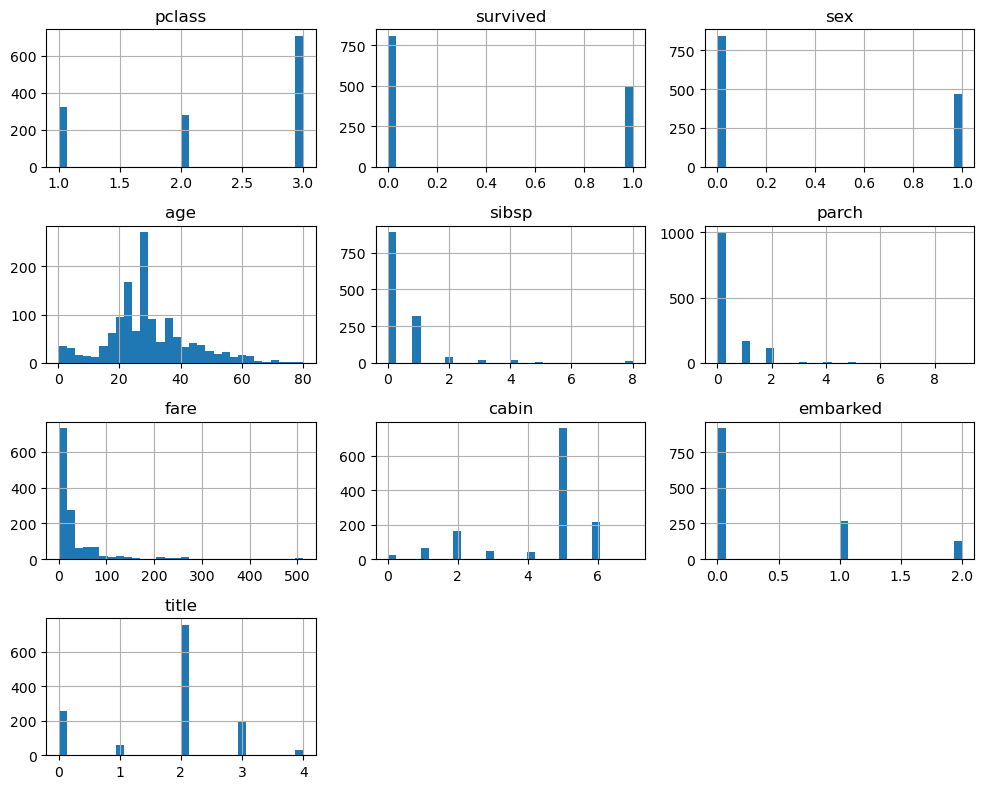

In [112]:
## Third approach: apply transformation
import matplotlib.pyplot as plt

data2.select_dtypes(include=['number']).hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()


In [114]:
df = data2.copy()
# Apply log transformation to the 'age' column
# Add a small constant (e.g., 1) to avoid issues with log(0) if there are zero or missing values
df['age'] = np.log(df['age'] + 1)
df['fare'] = np.log(df['fare'] + 1)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

# Step 5: Fit a linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model2.predict(X_test)

# Step 7: Convert predictions to binary (threshold = 0.5)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC-AUC score based on continuous predictions

# Display results
print("Model Coefficients:", model2.coef_)
print("Model Intercept:", model2.intercept_)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)


Model Coefficients: [-0.16651699  0.52811054 -0.63291201 -0.45378212 -0.23919141  0.22292024
 -0.24327338  0.06314888  0.12327669]
Model Intercept: 0.7937595287474246
Mean Squared Error: 0.14147059462823017
Accuracy: 0.7977099236641222
ROC-AUC Score: 0.8590740740740741


## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

### Replace Missing data in categorical variables with the string **Missing**

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [117]:
data3 = data.copy()
data3.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C,S,Master
2,1,0,female,2.0000,1,2,151.5500,C,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C,S,Mrs


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

### Scale the variables

- Use the standard scaler from Scikit-learn

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB
Number of numerical variables: 6
Number of categorical variables: 4
sex           2
cabin       181
embarked      3
title         5
dtype: int64
The range of value for each column are: 
      pclass  survived      ag

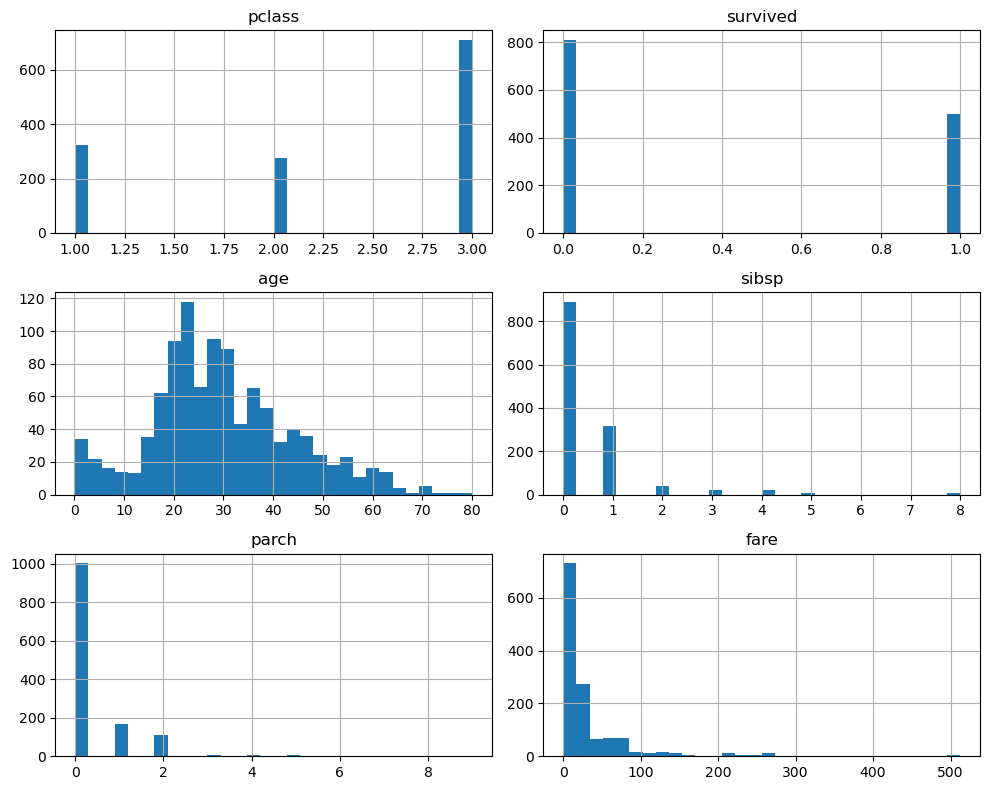

      sex   title      age
0  female    Miss  29.0000
1    male  Master   0.9167
2  female    Miss   2.0000
3    male      Mr  30.0000
4  female     Mrs  25.0000
      pclass  survived   sex   age  sibsp  parch  fare cabin embarked title
1225       3         0  male  60.5      0      0   NaN   NaN        S    Mr
   pclass  sibsp  parch      fare
0       1      0      0  211.3375
1       1      1      2  151.5500
2       1      1      2  151.5500
3       1      1      2  151.5500
4       1      1      2  151.5500
   pclass     sex cabin
0       1  female     B
1       1    male     C
2       1  female     C
3       1    male     C
4       1  female     C
     pclass  survived     sex   age  sibsp  parch  fare cabin embarked title
168       1         1  female  38.0      0      0  80.0     B      NaN  Miss
284       1         1  female  62.0      0      0  80.0     B      NaN   Mrs
   pclass  sibsp  parch embarked
0       1      0      0        S
1       1      1      2        S
2       

In [119]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# to build the models
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import mean_squared_error


# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

# data shape
data.shape

# Get info
data.info()

# data describe
data.describe()

# Data columns
data.columns

# Check Duplicates
data[data.duplicated(['cabin'])]

# find out how many missing values in each attribute
data.isna().sum()

# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

# find out how many missing values in each attribute
data.isna().sum()

# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables
target = 'survived'

vars_num = data.select_dtypes(include=['number']).columns # fill your code here

vars_cat = data.select_dtypes(include=['object', 'category']).columns# fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

### Find missing values in variables
# first in numerical variables
data.select_dtypes(include=['number']).isna().sum()
# now in categorical variables
data.select_dtypes(include=['object', 'category']).isna().sum()

### Determine cardinality of categorical variables
# Assuming 'data' is your DataFrame
categorical_columns = data.select_dtypes(include=['object', 'category'])
cardinality = categorical_columns.nunique()
print(cardinality)

# The range of value for each column
print("The range of value for each column are: \n", data.describe().loc[['min', 'max']])

### Determine the distribution of numerical variables
import matplotlib.pyplot as plt

data.select_dtypes(include=['number']).hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Impute Age column grouped by sex and title

# Group by 'sex' and 'title', then calculate the median age for each group
grouped_medians = data.groupby(['sex', 'title'])['age'].median()

# Define a function to fill missing values using the grouped medians
def impute_age(row):
    if pd.isna(row['age']):  # Check if Age is missing
        return grouped_medians[row['sex'], row['title']]  # Return the median for the group
    else:
        return row['age']

# Apply the function to fill missing values in the Age column
data['age'] = data.apply(impute_age, axis=1)

# Verify the results
print(data[['sex', 'title', 'age']].head())

# Show row in fare where 'Fare' has missing values
missing_fare_rows = data[data['fare'].isna()]

print(missing_fare_rows)

# Group by 'Pclass', 'SibSp', and 'Parch', then calculate the median Fare for each group
grouped_medians = data.groupby(['pclass', 'sibsp', 'parch'])['fare'].median()

# Define a function to impute missing Fare values
def impute_fare(row):
    if pd.isna(row['fare']):  # Check if Fare is missing
        return grouped_medians[row['pclass'], row['sibsp'], row['parch']]  # Return the group's median Fare
    else:
        return row['fare']

# Apply the function to the Fare column
data['fare'] = data.apply(impute_fare, axis=1)

# Verify the results
print(data[['pclass', 'sibsp', 'parch', 'fare']].head())

# first in numerical variables
data.select_dtypes(include=['number']).isna().sum()

# now in categorical variables
data.select_dtypes(include=['object', 'category']).isna().sum()

data.cabin.unique()

# Remove numbers and keep cabin letter
# Remove numbers from the 'Cabin' column and keep only letters
data['cabin'] = data['cabin'].str.replace(r'\d+', '', regex=True)

# Display the updated Cabin column
data.cabin.unique()

# Group by 'pclass' and 'sex' to calculate the mode for Cabin
grouped_modes = data.groupby(['pclass', 'sex'])['cabin'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Define a function to impute missing Cabin values
def impute_cabin(row):
    if pd.isna(row['cabin']):  # Check if Cabin is missing
        return grouped_modes[row['pclass'], row['sex']]  # Return the mode for the group
    else:
        return row['cabin']

# Apply the function to the Cabin column
data['cabin'] = data.apply(impute_cabin, axis=1)

# Verify the results
print(data[['pclass', 'sex', 'cabin']].head())

# Display the updated Cabin column
data.cabin.unique()

# Show row in fare where 'Fare' has missing values
missing_fare_rows = data[data['embarked'].isna()]

print(missing_fare_rows)

# Group by 'pclass', 'sibsp', and 'parch' to calculate the mode for 'embarked'
grouped_modes = data.groupby(['pclass', 'sibsp', 'parch'])['embarked'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

# Define a function to impute missing Embarked values
def impute_embarked(row):
    if pd.isna(row['embarked']):  # Check if Embarked is missing
        return grouped_modes[row['pclass'], row['sibsp'], row['parch']]  # Return the mode for the group
    else:
        return row['embarked']

# Apply the function to the Embarked column
data['embarked'] = data.apply(impute_embarked, axis=1)

# Verify the results
print(data[['pclass', 'sibsp', 'parch', 'embarked']].head())

# now in categorical variables
data.select_dtypes(include=['object', 'category']).isna().sum()

# Second approach using mapping and Minmax sacling
data2 = data.copy()

# Binary Encoding (most suitable for Sex since it has two categories)
data2['sex'] = data2['sex'].map({'male': 0, 'female': 1})

data2.sex.unique()

cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

# Apply the mapping to the 'cabin' column
data2['cabin'] = data2['cabin'].map(cabin_mapping)

# Display the transformed DataFrame
print(data2['cabin'].head())

cabin_mapping = {'S': 0, 'C': 1, 'Q': 2}

# Apply the mapping to the 'cabin' column
data2['embarked'] = data2['embarked'].map(cabin_mapping)

# Display the transformed DataFrame
print(data2['embarked'].head())

title_mapping = {'Miss': 0, 'Master': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4}

# Apply the mapping to the 'cabin' column
data2['title'] = data2['title'].map(title_mapping)

# Display the transformed DataFrame
print(data2['title'].head())

# Check for all
data2.head()

df = data2.copy()
# Apply log transformation to the 'age' column
# Add a small constant (e.g., 1) to avoid issues with log(0) if there are zero or missing values
df['age'] = np.log(df['age'] + 1)
df['fare'] = np.log(df['fare'] + 1)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns
)

# Step 5: Fit a linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model2.predict(X_test)

# Step 7: Convert predictions to binary (threshold = 0.5)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC-AUC score based on continuous predictions

# Display results
print("Model Coefficients:", model2.coef_)
print("Model Intercept:", model2.intercept_)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)




